In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('logistic_regression_data.csv', index_col=None, header=None)

In [3]:
df.columns = ['x_1', 'x_2', 'y']

In [4]:
df.head()

,x_1,x_2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
df.isnull().sum()

x_1    0
x_2    0
y      0
dtype: int64

No Null Values available in any column.

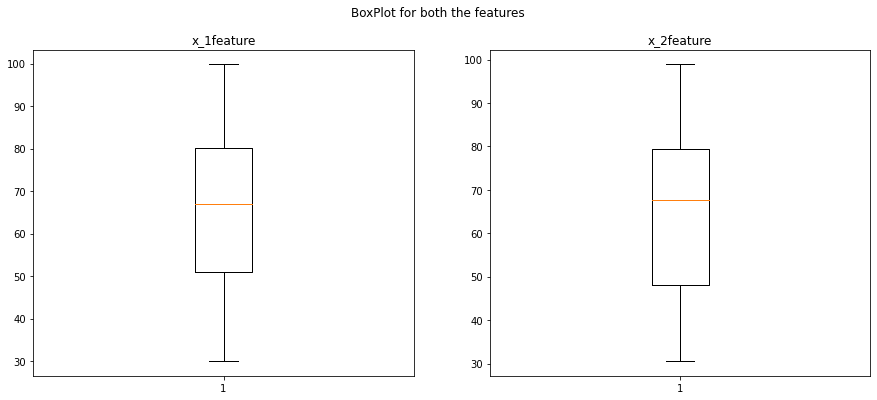

In [6]:
plt.figure(figsize=(15,6))
plt.suptitle('BoxPlot for both the features')

for i,clnm in enumerate(df.columns[:-1]):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[clnm])
    plt.title(clnm+"feature")

This shows that our data doesn't contain any outliers.

Now lets simply run the Logistic Regression and check it's accuracy, then we will apply regularization and see how it improves its score/accuracy.

In [7]:
Y = df['y']
df.drop(columns=['y'],inplace=True)
X = df

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.2, random_state=10)

In [9]:
from sklearn.linear_model import LogisticRegression

clf_wo_reg = LogisticRegression()

clf_wo_reg.fit(X_train, y_train)

LogisticRegression()

In [10]:
ypred_woreg = clf_wo_reg.predict(X_test)

In [11]:
df2_woreg = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':ypred_woreg})

In [12]:
df2_woreg.head()

,Actual,Predicted
0,1,1
1,0,0
2,0,1
3,1,1
4,1,1


In [13]:
clf_wo_reg.score(X_test, y_test)

0.8875

In [14]:
#Lets look at some other parameters for our model

from sklearn.metrics import mean_squared_error

print("The Mean Squared Error (MSE) for our model is : {}".format(mean_squared_error(ypred_woreg, y_test)))

The Mean Squared Error (MSE) for our model is : 0.1125


#Lets plot the confusion matrix to get some view of our predictions

<AxesSubplot:>

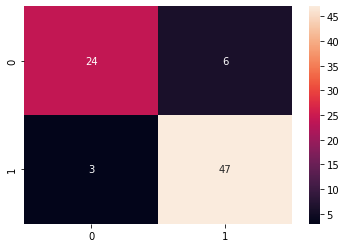

In [15]:
from sklearn.metrics import confusion_matrix

cnfm = confusion_matrix(y_test, ypred_woreg)
sns.heatmap(cnfm, annot=True)

Now till here we applied a simple Logistic Regression Model and seen that the accuracy is very good around 89%. But now lets take it with regularization and see if it affects the accuracy or not.

### With Regularizatin

In [16]:
X = []
y = []
df_X = pd.read_csv('logistic_regression_data_2.csv', index_col=None, header=None)
df_X.columns = ['x_1', 'x_2', 'y']
for i, row in df_X.iterrows():
    X.append([row.x_1, row.x_2])
    y.append(row.y)

In [17]:
#Both our X and y now became 2D array with the below code
X = np.atleast_2d(X)
y = np.atleast_2d(y).T

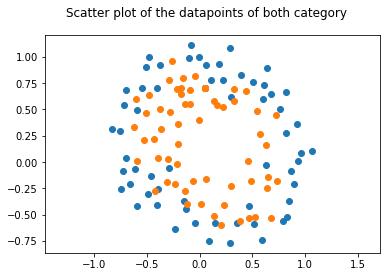

In [18]:
plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1])
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1])
plt.axis('equal')
plt.suptitle("Scatter plot of the datapoints of both category")
plt.show()

In [19]:
mul = np.matmul

def tranformX(X, norm=True):
    X = np.hstack((
        np.ones((X.shape[0], 1)),
        X,
        np.power(X, 2),
        np.atleast_2d(X[:, 0]*X[:, 1]).T,
        np.power(X, 3),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.power(X, 4),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.power(X, 5),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.power(X, 6),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.power(X, 7),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.power(X, 8),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.power(X, 9),
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
        np.atleast_2d(X[:, 0]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]*X[:, 1]).T,
    ))
    return X

def init_theta(X):
    return np.zeros((X.shape[1], 1))

def sigmoid(X):
    return np.power(1 + np.exp(-X), -1)

def h(X, theta):
    return sigmoid(mul(X, theta))

def j(theta, X, y, lamda=None):
    m = X.shape[0]
    theta[0] = 0
    if lamda:
        return (-(1/m) * (mul(y.T, np.log(h(X, theta))) + mul((1-y).T, np.log(1 - h(X, theta)))) + (lamda/(2*m))*mul(theta.T, theta))[0][0] 
    return -(1/m) * (mul(y.T, np.log(h(X, theta))) + mul((1-y).T, np.log(1 - h(X, theta))))[0][0]

#Regularized Gradient 
def j_prime(theta, X, y, lamda=None):
    m = X.shape[0]
    theta[0] = 0
    if lamda:
        return (1/m) * mul(X.T, (h(X, theta) - y)) + (lamda/m) * theta 
    return (1/m) * mul(X.T, (h(X, theta) - y)) 

#Simultaneous Update
def update_theta(theta, X, y, lamda=None):
    return theta - alpha * j_prime(theta, X, y, lamda)



In [45]:
X_trans = tranformX(X)
theta = init_theta(X_trans)

alpha = 0.1
tolerance = 0.00001
prev_j = 10000
lamda = None
curr_j = j(theta, X_trans, y, lamda)

counter = 0
while(abs(curr_j - prev_j) > tolerance):
    theta = update_theta(theta, X_trans, y, lamda)
    prev_j = curr_j
    curr_j = j(theta, X_trans, y, lamda)
    if counter%500==0:
        print(curr_j)
    counter += 1


0.6913212624236081
0.567215805549171
0.5408412850587747
0.5258832245370714
0.515405617741571
0.5071549808680718
0.5001813083682839
0.4940323722331996
0.48847243676114377


In [46]:
x1, x2 = np.mgrid[-1.1:1.2:.01, -1.1:1.2:.01]
grid = np.c_[x1.ravel(), x2.ravel()]
grid = tranformX(grid, False)

In [47]:
probs = h(grid, theta).reshape(x1.shape)

C:\Users\kp779\AppData\Local\Temp/ipykernel_36384/243167180.py:2: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(x1, x2, probs, 10, cmap="RdBu", vmin=0, vmax=1, color='b')
C:\Users\kp779\AppData\Local\Temp/ipykernel_36384/243167180.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(x1, x2, np.round(probs), vmin=0, vmax=1, color='black')


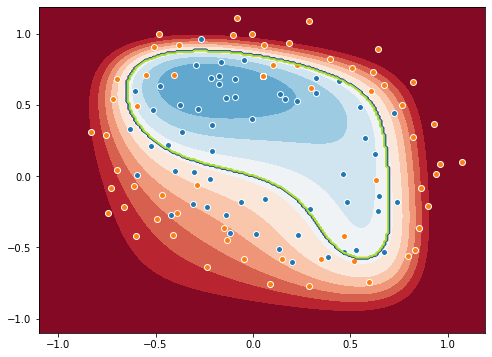

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(x1, x2, probs, 10, cmap="RdBu", vmin=0, vmax=1, color='b')
ax.contour(x1, x2, np.round(probs), vmin=0, vmax=1, color='black')
plt.scatter(X_trans[np.where(y==1), 1], X_trans[np.where(y==1), 2], edgecolors='white')
plt.scatter(X_trans[np.where(y==0), 1], X_trans[np.where(y==0), 2], edgecolors='white')
plt.show()

C:\Users\kp779\AppData\Local\Temp/ipykernel_36384/843744139.py:2: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contourf(x1, x2, probs, 10, cmap="RdBu", vmin=0, vmax=1, color='b',)
C:\Users\kp779\AppData\Local\Temp/ipykernel_36384/843744139.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(x1, x2, np.round(probs), vmin=0, vmax=1, color='black')


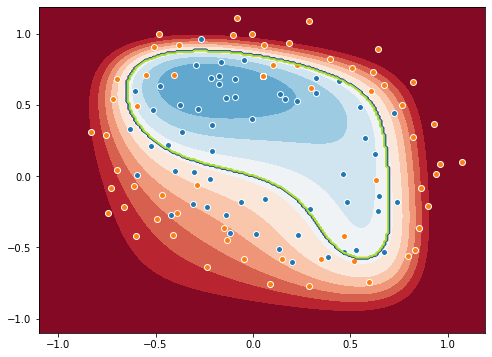

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contourf(x1, x2, probs, 10, cmap="RdBu", vmin=0, vmax=1, color='b',)
ax.contour(x1, x2, np.round(probs), vmin=0, vmax=1, color='black')
plt.scatter(X_trans[np.where(y==1), 1], X_trans[np.where(y==1), 2], edgecolors='white')
plt.scatter(X_trans[np.where(y==0), 1], X_trans[np.where(y==0), 2], edgecolors='white')
plt.show()